<a href="https://colab.research.google.com/github/mingshey/python_mechanics/blob/main/Python%EA%B3%A0%EC%A0%84%EC%97%AD%ED%95%99_009b_Ch3_CPs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analytical Mechanics with Python
# 파이썬으로 코딩하는 고전역학

# Chapter 3
# Computer Problems

## C3.1 Simple Pendulum

In [ ]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
g = 9.8062
L = 1.0

단진자의 정확한 운동 방정식:

$$ \ddot\theta + \omega_0^2 \sin\theta = 0 $$

$ \Rightarrow $

$$ \left\{
\begin{align}
\frac{d\theta}{dt} &= \dot\theta \\
\frac{d\dot\theta}{dt} &= - \omega_0^2 \sin\theta
\end{align} \right.
$$

여기서 $\omega_0^2 = g/L$

In [ ]:
omega_0 = np.sqrt(g/L)

# 단진자(simple pendulum)의 상태 변화율
def simpen(t, S):
  theta, theta_dot = S
  theta_ddot = - omega_0**2 * np.sin(theta)
  return (theta_dot, theta_ddot)

In [ ]:
# 초기 값을 변화시키며 시뮬레이션을 진행하기 편하도록
# 시뮬레이션 작업을 클래스로 만든다.

class simul_simpen:     # 'simpen' for 'simple pendulum'
  def __init__(self, S0):
    self.S0 = S0
    self.tf = 4.0
    self.N = 1000
    self.method="RK45"

  def run(self):
    tspan = (0, self.tf)
    teval = np.linspace(0, self.tf, self.N+1)
    dt = self.tf/self.N
    sol = solve_ivp(simpen, tspan, self.S0, self.method, t_eval=teval, max_step=dt)
    return sol

In [ ]:
# 단순조화진동 근사해를 계산하는 함수(단진자의 진폭이 작을 때)

def small_osc(t, S0):
  theta0, theta_dot0 = S0
  omega0 = np.sqrt(g/L)
  A = theta0
  B = theta_dot0/omega0
  return A * np.cos(omega0 * t) + B * np.sin(omega0 * t)

작은 진폭 근사에서의 주기:

$$ P_0 = 2\pi\sqrt\frac{L}{g}$$

In [ ]:
# 작은 진폭 주기:

P0 = 2 * np.pi * np.sqrt( L / g)
print(f"P0 = {P0:.4f}")

(0) 작은 진폭일 때: 근사해와 비교

$\theta_0 = 0.1$ [rad], $\dot{\theta}_0 = 0$.

In [ ]:
S0_0 = (0.1, 0)
sim0 = simul_simpen(S0_0)
sol0 = sim0.run()

In [ ]:
sol_0 = small_osc(sol0.t, S0_0)

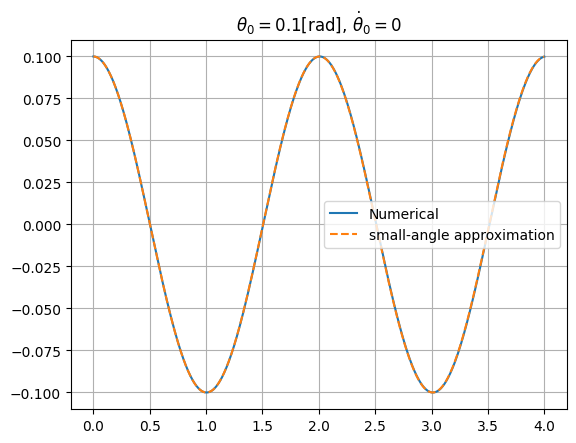

In [ ]:
plt.title(r"$\theta_0=0.1$[rad], $\dot{\theta}_0=0$")
plt.grid()
plt.plot(sol0.t, sol0.y[0], label="Numerical")
plt.plot(sol0.t, sol_0, ls = '--', label="small-angle approximation")
plt.legend()

 (a) $\theta_0 = \dfrac{\pi}{2}$, $\dot{\theta}_0 = 0$

In [ ]:
S0a = (np.pi/2, 0)
sim1 = simul_simpen(S0a)
sol1 = sim1.run()

In [ ]:
sol_a = small_osc(sol1.t, S0a)

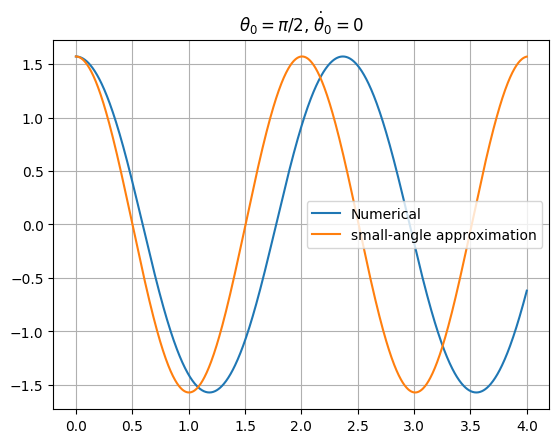

In [ ]:
plt.title(r"$\theta_0=\pi/2$, $\dot{\theta}_0=0$")
plt.grid()
plt.plot(sol1.t, sol1.y[0], label="Numerical")
plt.plot(sol1.t, sol_a, label="small-angle approximation")
plt.legend()

(b)  $\theta_0 = 3.10\ {\rm rad}$, $\dot{\theta}_0 = 0$

In [ ]:
S0b = (3.10, 0)
sim2 = simul_simpen(S0b)
sol2 = sim2.run()
sol_b = small_osc(sol2.t, S0b)

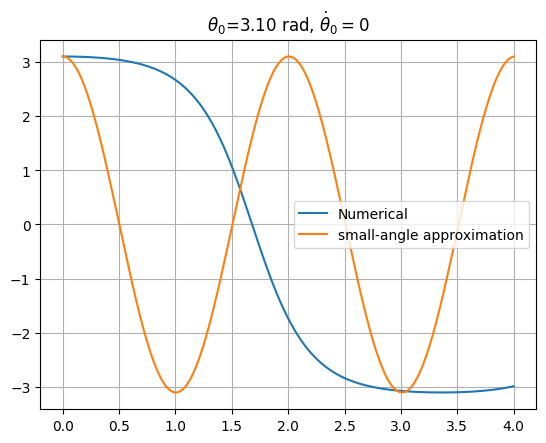

In [ ]:
plt.title(r"$\theta_0$=3.10 rad, $\dot{\theta}_0=0$")
plt.grid()
plt.plot(sol2.t, sol2.y[0], label="Numerical")
plt.plot(sol2.t, sol_b, label="small-angle approximation")
plt.legend()

(c) 각진폭이 $\Theta_0$일 때, 연습문제 3.25에서 $$ T = 4\sqrt\frac{L}{g}\int_0^{\pi/2}\frac{d\phi}{\left(1-\alpha\sin^2\phi\right)^{1/2}}  \space\space\space\space{\rm 여기서\space} \alpha = \sin^2 \frac{1}{2}\Theta_0$$

이고,
$O(\Theta_0^2)$까지의 근사식은
$$ T \approx 2\pi\sqrt\frac{L}{g}\left(1+\frac{1}{16}\Theta_0^2 + \dots\right)$$

In [ ]:
import scipy.integrate as integrate

In [ ]:
# 주기에 대한 2차 근사식
def Tquad(theta0):
  return 2 * np.pi * np.sqrt(L/g) * (1 + (1/16) * theta0**2)

# 피적분 함수
def integrand(phi, th0):
    alpha = np.sin(th0/2)**2
    return 1/np.sqrt(1-alpha * np.sin(phi)**2)

# 수치 적분으로 주기를 구하는 함수
# scipy.integrate.quad  이용 (quadrature:구적법)
def get_period(th0):
    return 4.0 * np.sqrt(L/g) * integrate.quad(lambda phi: integrand(phi, th0), 0, np.pi/2)[0]

In [ ]:
# theta0 = 0.5 rad 일 때의 주기 (수치 적분)
4*np.sqrt(L/g)*integrate.quad(lambda phi: integrand(phi, 0.5), 0, np.pi/2)[0]

np.float64(2.0382627239532956)

In [ ]:
# 2차 근삿값
Tquad(0.5)

np.float64(2.0378061929624285)

In [ ]:
init_angles = np.linspace(0, 3.1, 32)

periods = [get_period(angle) for angle in init_angles]

In [ ]:
pc = np.polyfit(init_angles, periods, 7)

In [ ]:
pc

array([  0.20783419,  -2.01474905,   7.68494434, -14.53032266,
        14.13208579,  -6.43521833,   1.14461719,   1.97746517])

In [ ]:
pf = np.poly1d(pc)

In [ ]:
print(pf)

        7         6         5         4         3         2
0.2078 x - 2.015 x + 7.685 x - 14.53 x + 14.13 x - 6.435 x + 1.145 x + 1.977


In [ ]:
th0s = np.linspace(0.0, 3.1, 1000)

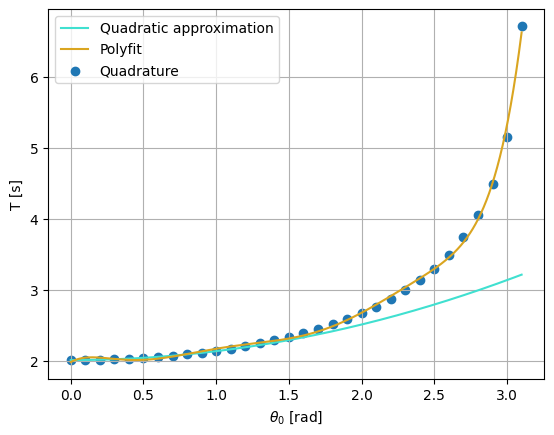

In [ ]:
plt.grid()
plt.xlabel(r"$\theta_0$ [rad]")
plt.ylabel("T [s]")
plt.plot(th0s, Tquad(th0s), c="turquoise", label="Quadratic approximation") # 2차 근사
plt.plot(th0s, pf(th0s), c="goldenrod", label="Polyfit") # 다항식 피팅
plt.scatter(init_angles, periods, label="Quadrature")    # 수치 구적법
plt.legend()

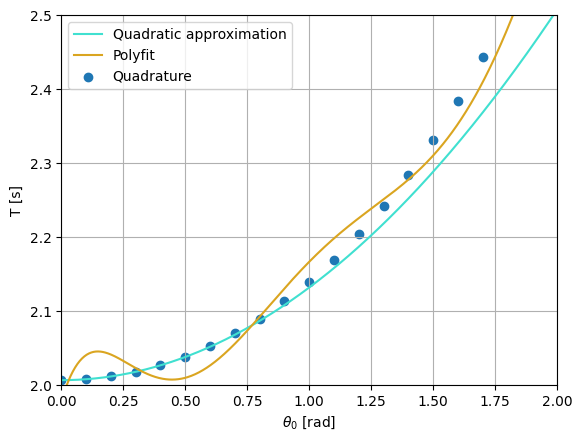

In [ ]:
plt.grid()
plt.xlabel(r"$\theta_0$ [rad]")
plt.ylabel("T [s]")
plt.xlim([0.0, 2.0])
plt.ylim([2.0, 2.5])
plt.plot(th0s, Tquad(th0s), c="turquoise", label="Quadratic approximation") # 2차 근사
plt.plot(th0s, pf(th0s), c="goldenrod", label="Polyfit") # 다항식 피팅
plt.scatter(init_angles, periods, label="Quadrature")    # 수치 구적법
plt.legend()

두 개의 그래프를 나란히 그리기:

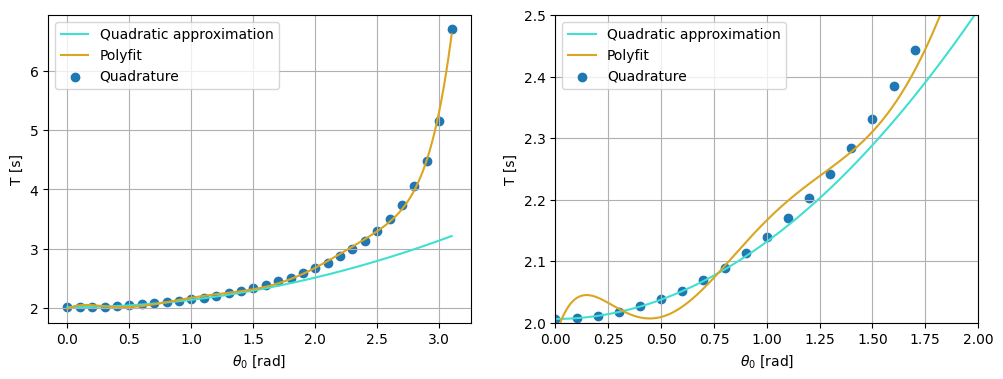

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].grid()
ax[0].set_xlabel(r"$\theta_0$ [rad]")
ax[0].set_ylabel("T [s]")
ax[0].plot(th0s, Tquad(th0s), c="turquoise", label="Quadratic approximation") # 2차 근사
ax[0].plot(th0s, pf(th0s), c="goldenrod", label="Polyfit") # 다항식 피팅
ax[0].scatter(init_angles, periods, label="Quadrature")    # 수치 구적법
ax[0].legend()

ax[1].grid()
ax[1].set_xlabel(r"$\theta_0$ [rad]")
ax[1].set_ylabel("T [s]")
ax[1].set_xlim([0.0, 2.0])
ax[1].set_ylim([2.0, 2.5])
ax[1].plot(th0s, Tquad(th0s), c="turquoise", label="Quadratic approximation") # 2차 근사
ax[1].plot(th0s, pf(th0s), c="goldenrod", label="Polyfit") # 다항식 피팅
ax[1].scatter(init_angles, periods, label="Quadrature")    # 수치 구적법
ax[1].legend()


주기가 $2\pi\sqrt{L/g}$에서 2% 큰 진폭은?

2차식 근사에서 해를 구하는 방법

$$ \frac{1}{16}\Theta_0^2 = \frac{1}{50}$$

$$ \Theta_0 = \frac{4}{5\sqrt{2}} \approx 0.565685...$$

In [ ]:
theta1 = 4/(5*np.sqrt(2))
theta1

np.float64(0.565685424949238)

이 값을 이용하여 수치 구적법으로 구한 주기를 $2\pi\sqrt{L/g}$와 비교해 본다:

In [ ]:
period1 = get_period(theta1)
print(f"period1 = {period1 / P0:.4f} P0")

period1 = 1.0204 P0


수치 적분으로 계산한 값들로부터 polyfit으로 구한 맞춤 함수를 이용하는 방법:

In [ ]:
from scipy.optimize import fsolve

In [ ]:
theta0_2percent = fsolve(lambda x: pf(x) - 1.02 * P0, 0.5)[0]
print(f"theta0(2%) = {theta0_2percent:.3f} [rad]")

theta0(2%) = 0.672 [rad]


이렇게 구한 각진폭에서 주기가 $2\pi\sqrt{L/g}$보다 2% 큰지 확인해 본다:

In [ ]:
get_period(theta0_2percent) / P0

Polyfit을 사용할 때 데이터에 급격히 변하는 부분이 포함되어 있어 다항식 근사가 부정확할 수 있으므로, 근사에 사용하는 데이터 범위를 좁혀 다시 시도해 본다:

In [ ]:
pc2 = np.polyfit(init_angles[:20], periods[:20], 7)

In [ ]:
pf2 = np.poly1d(pc2)

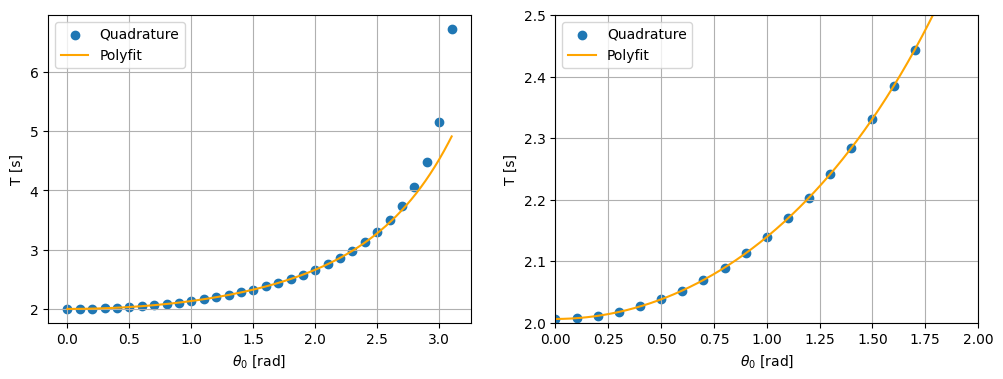

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].grid()
axs[0].set_xlabel(r"$\theta_0$ [rad]")
axs[0].set_ylabel("T [s]")
axs[0].scatter(init_angles, periods, label="Quadrature")
axs[0].plot(th0s, pf2(th0s), c="orange", label="Polyfit")
axs[0].legend()

axs[1].grid()
axs[1].set_xlabel(r"$\theta_0$ [rad]")
axs[1].set_ylabel("T [s]")
axs[1].set_xlim([0, 2.0])
axs[1].set_ylim([2, 2.5])
axs[1].scatter(init_angles, periods, label="Quadrature")
axs[1].plot(th0s, pf2(th0s), c="orange", label="Polyfit")
axs[1].legend()

좁은 범위의 데이터로부터 구한 다항식 맞춤은 모든 범위에 잘 들어맞지는 않지만, 맞춤에 사용한 데이터를 포함하는 범위에서는 더 잘 들어맞는다.

In [ ]:
theta0_2percent2 = fsolve(lambda x: pf2(x) - 1.02 * P0, 0.5)[0]
print(f"theta0(2%) = {theta0_2percent2:.5f} [rad]")

theta0(2%) = 0.56055 [rad]


이렇게 구한 각진폭에서 주기가 $2\pi\sqrt{L/g}$보다 2% 큰지 확인해 본다:

In [ ]:
get_period(theta0_2percent2) / P0

np.float64(1.0199991873278835)

### 유리 함수 맞춤(rational fitting)

$p(x)$, $q(x)$가 각각 $x$의 다항식일 때, 함수 $f(x)$를

$$ f(x) \approx \frac{p(x)}{q(x)}$$

꼴의 유리 함수로 근사하는 방법이다. $p(x)$는 $n$차 다항식
$$ p(x) = a_n x^n + a_{n-1} x^{n-1} + \dots + a_2 x^2 + a_1 x^1 + a_0, $$
$q(x)$는 $m$차 다항식 $$ q(x) = b_m x^m + b_{m-1} x^{m-1} + \dots + b_2 x^2 + b_1 x^1 + b_0$$이라 하면, 보통 q(x)의 $0$차 항, 즉 상수항을 $b_0 = 1$로 규격화한다.
이 때 독립적인 계수, $a_i$, $b_j$ 는 고정 값인 $b_0=1$를 제외하면 총 갯수가 $n+m+1$ 개이므로, 피팅을 위한 샘플의 갯수는 최소 $n+m+1$ 개이어야 한다.

유리 함수 근사는 데이터에 급격히 변하는 부분이 포함되어 있을 때 적당히 신뢰할만한 값을 줄 수 있다.

In [ ]:
from scipy.optimize import curve_fit
from numpy import polyfit, poly1d

In [ ]:
def rationalpq(x, p, q):
  return np.polyval(p, x) / np.polyval(np.append(q, [1.]), x)

def rationalp(x, *p):
  n = len(p)
  ndiv = (n+1)//2
  return rationalpq(x, p[:ndiv], p[ndiv:])

def print_rat(*p):
  n = len(p)
  ndiv = (n+1)//2
  numer = poly1d(p[:ndiv]) # 분자
  numlen = len(numer)
  denom = poly1d(np.append(p[ndiv:], [1.])) # 분모
  print(f"{numer}")
  print("-" * numlen * 12)
  print(f"{denom}")

In [ ]:
nfit = 7 # 맞춤 차수: 독립적인 계수의 갯수
p0 = np.ones(nfit)
popt, pcov = curve_fit(rationalp, init_angles, periods, p0)
print(popt)
yrat = rationalp(th0s, *popt)

[ 0.0169075  -0.14407979 -0.32861419  2.00735288  0.03116577 -0.1479712
 -0.15820032]


In [ ]:
print_rat(*popt)

         3          2
0.01691 x - 0.1441 x - 0.3286 x + 2.007
------------------------------------
         3         2
0.03117 x - 0.148 x - 0.1582 x + 1


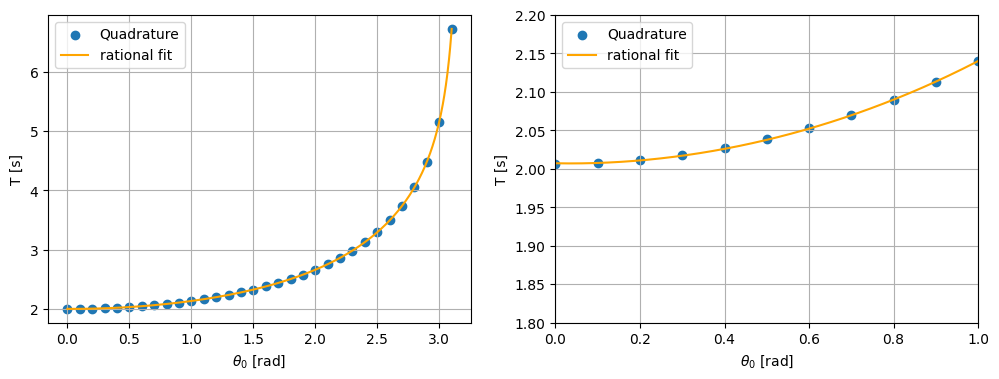

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].grid()
axs[0].set_xlabel(r"$\theta_0$ [rad]")
axs[0].set_ylabel("T [s]")
axs[0].scatter(init_angles, periods, label="Quadrature")
axs[0].plot(th0s, yrat, c="orange", label="rational fit")
axs[0].legend()

axs[1].grid()
axs[1].set_xlabel(r"$\theta_0$ [rad]")
axs[1].set_ylabel("T [s]")
axs[1].set_xlim([0, 1.0])
axs[1].set_ylim([1.8, 2.2])
axs[1].scatter(init_angles, periods, label="Quadrature")
axs[1].plot(th0s, yrat, c="orange", label="rational fit")
axs[1].legend()

In [ ]:
theta0_2_rat = fsolve(lambda x: rationalp(x, *popt) - 1.02 * P0, 0.5)[0]
print(f"theta0(2%) = {theta0_2_rat:.5f} [rad]")

theta0(2%) = 0.56302 [rad]


In [ ]:
get_period(theta0_2_rat) / P0

np.float64(1.0201797584037833)

## C3.2 Damped Harmonic Oscillator

* 제곱형 저항을 받는 경우:

$$ \ddot{x} + 2\gamma \dot{x} \left| \dot{x} \right| + \omega_0^2 x = 0 $$
(여기서 $\gamma = c_2 / 2m$,  $\omega_0^2 = k/m$)

* 선형 저항을 받는 경우:

$$ \ddot{x} + 2\gamma \dot{x} + \omega_0^2 x = 0 $$

($\gamma = c_1 / 2m$)

(a) $\gamma=0.2$(단위는 제곱형 저항:$\rm m^{-1}$; 선형 저항: $\rm s^{-1}$), $\omega_0 = 2.0\ \rm rad/s$ 인 경우 각각 제곱형 저항과 선형 저항을 받는 조화진자의 수치 적분 해:

제곱형 저항:

$$
\begin{align}
  \frac{dx}{dt} &= v\\
  \frac{dv}{dt} &= - 2 \gamma v |v| - \omega_0^2 x
\end{align}
$$

선형 저항:

$$
\begin{align}
  \frac{dx}{dt} &= v\\
  \frac{dv}{dt} &= - 2 \gamma v - \omega_0^2 x
\end{align}
$$

여기서 $\omega_0^2 = k/m$이고, $\gamma = c_2 / 2 m$(제곱형 저항) 또는 $\gamma = c_1 / 2 m$(선형 저항) 이다.


In [ ]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
gamma = 0.20
oo0 = 2.00

# 제곱형 저항
def DHO_q(t, S, gamma, omega0):  # ㅎ+[한자],[PgDn],[PgDn],[9] --> γ(gamma)
  x, v = S
  dvdt = -2 * gamma * v * np.abs(v) - omega0**2 * x
  return (v, dvdt)

# 선형 저항
def DHO_l(t, S, gamma, omega0):
  x, v = S
  dvdt = -2 * gamma * v - omega0**2 * x
  return (v, dvdt)

In [ ]:
x0, v0 = 1.00, 0.0 # 초기 위치 및 속도
tf = 20            # 시뮬레이션 시간 구간
N = 1000           # 구간 분할 수
dt = tf/N          # 분할된 시간 간격
teval = np.linspace(0, tf, 10*N+1)

# args=(gamma, oo0)는 각각 DOH_q, DOH_l에 넘겨주는 매개변수:
solq = solve_ivp(DHO_q, (0, tf), (x0, v0), t_eval=teval, max_step = dt, args=(gamma, oo0))
soll = solve_ivp(DHO_l, (0, tf), (x0, v0), t_eval=teval, max_step = dt, args=(gamma, oo0))

In [ ]:
plt.grid()
plt.xlabel("t [s]")
plt.ylabel("x [m]")
plt.plot(solq.t, solq.y[0], label="Quadratic damping")
plt.plot(soll.t, soll.y[0], label="Linear damping")
plt.legend()

(b) 감쇠 진동의 극값들은 절댓값이 대략 지수함수적으로 감소한다. 즉 연쇄적인 극값의 배열을 $x(t_n)$이라 하면, $ \gamma $ 가 작은 약한 감쇠일 때 대략

$$x(t_n) \propto e^{-\gamma t_n}$$

에 비례한다고 볼 수 있으므로, 양 변에 로그를 취하면

$$ \ln x(t_n) \propto -\gamma t_n$$

이고, 이 관계식을 나타내는 그래프의 기울기는 $-\gamma$에 가까운 값으로 볼 수 있다.

In [ ]:
from scipy.signal import find_peaks

In [ ]:
# 선형 저항에 대한 모의 실험 결과로부터 피크 값들의 색인을 검색한다.
idpks = find_peaks(np.abs(soll.y[0]))[0]
idpks

In [ ]:
# 시작점은 피크 값 검색에서 배제되므로 우선 배열에 추가해준다:
idpks = np.append([0], idpks)
idpks

In [ ]:
# 피크 값들이 나타나는 시각과, 이에 대응되는 피크 값의 절댓값 목록을 각각 만든다:

tpks = soll.t[idpks]
peaks = np.abs(soll.y[0][idpks])

In [ ]:
plt.title("Linear damping")
plt.grid()
plt.xlabel(r"$t_n$ [s]")
plt.ylabel(r"$\ln x(t_n)$")
plt.scatter(tpks, np.log(peaks))

* 위 그래프의 기울기로부터 $\gamma$의 근삿값을 구한다:

In [ ]:
pcL = np.polyfit(tpks, np.log(peaks), 1)
-pcL[0]   # gamma value by simulation

(c) Critical damping
$$ \gamma = \omega_0$$

In [ ]:
class simDHO:
  def __init__(self, gamma, oo0, quad=False):
    self.gamma = gamma
    self.oo0 = oo0
    self.quad = quad
    self.tf = 5.0
    self.N = 1000
    self.dt = self.tf / self.N

  def set_tf(self, tf):
    self.tf = tf

  def set_N(self, N):
    self.N = N

  def set_dt(self, dt):
    self.dt = dt

  def DHO_q(self, t, S):
    x, v = S
    dvdt = -2 * self.gamma * v * np.abs(v) - self.oo0**2 * x
    return (v, dvdt)

  def DHO_l(self, t, S):
    x, v = S
    dvdt = -2 * self.gamma * v - self.oo0**2 * x
    return (v, dvdt)

  def run(self):
    tf = self.tf
    N = self.N
    teval=np.linspace(0, tf, N+1)
    dt = self.dt
    tspan=(0, tf)
    S0=(1.0, 0)

    if self.quad == True:
      dSdt = self.DHO_q
    else:
      dSdt = self.DHO_l

    return solve_ivp(dSdt, tspan, S0, "RK45", teval, max_step=dt)

In [ ]:
sim_crit = simDHO(oo0, oo0, False)
solc = sim_crit.run()
solc

In [ ]:
# 임계 감쇠
plt.grid()
plt.title("Critical damping")
plt.xlabel("t [s]")
plt.ylabel("x [m]")
plt.plot(solc.t, solc.y[0])

제곱형 감쇠의 경우:

선형 감쇠에서와 같이 연속적인 피크의 절댓값을 구하여 로그를 취한 값들을 그래프로 그려보면,

In [ ]:
idpksq = np.append([0], find_peaks(np.abs(solq.y[0]))[0])

In [ ]:
tpksq = solq.t[idpksq]
peaksq = np.abs(solq.y[0][idpksq])

In [ ]:
plt.title("Quadratic damping")
plt.grid()
plt.xlabel(r"$t_n$ [s]")
plt.ylabel(r"$\ln x(t_n)$")
plt.scatter(tpksq, np.log(peaksq))

이와 같이 $\ln x(t_n)$이 $t_n$에 선형 비례하지 않으므로 그래프의 모습에서 $\gamma$ 값을 알아내기는 어렵다.

대신, $\gamma$ 값을 변화시켜 보며 최초의 음($-$)의 피크의 절댓값이 초기 변위의 2%인 $\gamma$ 값을 찾아보기로 한다.

In [ ]:
# 일정 범위의 gamma 값들을 선택하여 사전 탐색을 위한 모의실험을 진행한다.
nDiv = 20 # Number of divisions of domain
gammas = np.linspace(0, 20, nDiv+1)
sims = [simDHO(gamma, oo0, True) for gamma in gammas]
for sim in sims:
  sim.set_tf(20.0)

sols = [sim.run() for sim in sims]

In [ ]:
# 각각의 모의 실험 결과로부터 피크 값들의 색인을 구한다.
ksm = range(len(sols))
idpksm = [find_peaks(np.abs(sols[k].y[0]))[0] for k in ksm]

In [ ]:
#
tpksm = [sols[k].t[idpksm[k]] for k in ksm]
pksm  = [np.abs(sols[k].y[0][idpksm[k]]) for k in ksm]

In [ ]:
peaksm = [pksm[k][0] for k in ksm]

In [ ]:
plt.grid()
plt.ylim([0, 0.1])
plt.xlabel("gamma")
plt.ylabel("|first peak|")
plt.plot(gammas, peaksm, marker="o")
plt.axhline(0.02, c='gray')

In [ ]:
from scipy.optimize import fsolve

In [ ]:
# 탐색 결과 중 변화가 완만하고 해를 포함하는 것으로 보이는 부분으로부터 맞춤 다항 함수를 생성한다:
pc3 = np.polyfit(gammas[nDiv//2:], peaksm[nDiv//2:], 4)
pf3 = np.poly1d(pc3)

# pf3(gamma) 값이 0.02인 gamma를 다항 함수의 해로 찾는다. 초기 근사치로 그래프를 참조하여 12.5로 설정함:
gamma_q = fsolve(lambda x: pf3(x)-0.02, 12.5)
gamma_q

In [ ]:
gamma_fit = np.linspace(2, 20, 100)
peaks_fit = pf3(gamma_fit)

plt.grid()
plt.ylim([0, 0.1])
plt.xlabel("gamma")
plt.ylabel("|first peak|")
plt.scatter(gammas, peaksm, marker="o", label="Data")
plt.plot(gamma_fit, peaks_fit, color='orange', label="Polyfit")
plt.scatter(gamma_q, pf3(gamma_q), \
            facecolor="white", edgecolor="r", zorder=3, \
            label="Interpolation")
plt.axhline(0.02, c='gray')
plt.legend()

* Rational Fit을 이용하는 경우:

In [ ]:
popt2, pcov2 = curve_fit(rationalp, gammas[nDiv//2:], peaksm[nDiv//2:], np.ones(9))
print(popt2)

In [ ]:
gamma_r = fsolve(lambda x: rationalp(x, *popt2) - 0.02, 12.5)
gamma_r

In [ ]:
gamma_rat=np.linspace(0, 20, 100)
peaks_rat = rationalp(gamma_rat, *popt2)

fig, ax = plt.subplots(1, 1, figsize=(6, 4))

ax.grid()
ax.set_xlabel("gamma")
ax.set_ylabel("|first peak|")
ax.set_ylim([0, 0.1])
ax.scatter(gammas, peaksm, marker="o", label="Data")
ax.plot(gamma_rat, peaks_rat, label="rational fit")
ax.scatter(gamma_r, rationalp(gamma_r, *popt2), \
            facecolor="white", edgecolor="r", zorder=3, \
            label="Interpolation")
ax.axhline(0.02, c='gray')
ax.legend()


In [ ]:
# 이렇게 구한 gamma 값으로 시뮬레이션을 진행해 본다.
simq = simDHO(gamma_r[0], oo0, True)
simq.set_tf(20.0)
simq.set_N(10000)
solq = simq.run()

In [ ]:
# 시뮬레이션 결과에서 피크 값을 검색한다
pksq = find_peaks(np.abs(solq.y[0]))
pksq, solq.t[pksq[0]], solq.y[0][pksq[0]]

In [ ]:
# 검색된 첫번째 피크 값.
solq.y[0][pksq[0][0]]

In [ ]:
# 시뮬레이션 결과 플로팅:
plt.title("Quad. damping")
plt.grid()
plt.xlabel("t [s]")
plt.ylabel("x [m]")
plt.plot(solq.t, solq.y[0], 'r-')
plt.scatter(solq.t[pksq[0]], solq.y[0][pksq[0]], \
            marker='o', facecolor="white", edgecolor="r", zorder=2)

## C3.3 반데르 폴 Van der Pol 진동자

$$ \ddot{x} -\gamma\left( A^2 - x^2 \right) \dot{x} + \omega_0^2 x = 0 $$

In [ ]:
# A = 1, omega0 = 1 일 때

# van der Pol 진동자의 변화율 함수
def VDP(t, S, gamma=1):
  x, v = S
  dvdt = gamma * (1 - x**2) * v - x
  return (v, dvdt)

# 매개 변수를 변화시키며 모의실험을 할 수 있도록 클래스를 작성한다:
class simVDP:
  def __init__(self, x0, v0, gamma):
    self.x0 = x0
    self.v0 = v0
    self.gamma = gamma

  def run(self):
    tf = 20 * np.pi
    N = 1000
    dt = tf / N
    tspan = (0, tf)
    teval = np.linspace(0, tf, N+1)
    S0 = (self.x0, self.v0)

    return solve_ivp(VDP, tspan, S0, "RK45", teval, \
                     False, None, False, (self.gamma,), max_step=dt)

In [ ]:
# (a) gamma = 0.1, (x0, xdot0) = (-3, 0)
# (b) gamma = 0.1, (x0, xdot0) = (1, 0)
sim_a = simVDP(-3.0, 0, 0.1)
sim_b = simVDP(1.0, 0, 0.1)

# (c) gamma = 0.5, (x0, xdot0) = (-3, 0)
# (d) gamma = 0.5, (x0, xdot0) = (1, 0)
sim_c = simVDP(-3.0, 0, 0.5)
sim_d = simVDP(1.0, 0, 0.5)

In [ ]:
sol_a = sim_a.run()
sol_b = sim_b.run()
sol_c = sim_c.run()
sol_d = sim_d.run()

In [ ]:
plt.grid()
plt.xlabel("x")
plt.ylabel("dx/dt")
plt.plot(sol_a.y[0], sol_a.y[1], c='coral', label = "(a)")
plt.plot(sol_b.y[0], sol_b.y[1], c='turquoise', label = "(b)")
plt.scatter(sol_a.y[0,0], sol_a.y[1,0], c='red', zorder=2)
plt.scatter(sol_b.y[0,0], sol_b.y[1,0], c='navy', zorder=2)
plt.legend()

In [ ]:
plt.grid()
plt.xlabel("x")
plt.ylabel("dx/dt")
plt.plot(sol_c.y[0], sol_c.y[1], c='orange', label = "(c)")
plt.plot(sol_d.y[0], sol_d.y[1], c='limegreen', label = "(d)")
plt.scatter(sol_c.y[0,0], sol_c.y[1,0], c='goldenrod', zorder=2)
plt.scatter(sol_d.y[0,0], sol_d.y[1,0], c='green', zorder=2)
plt.legend()

## C3.4 구동력을 받는 van der Pol 진동자
$A=1$, $\omega_0 = 1$인 경우:

$$ \ddot{x} -\gamma\left( 1 - x^2 \right) \dot{x} + x = \alpha\cos\omega t $$

여기서 $\alpha$는 구동력의 진폭, $\omega$는 구동 (각)진동수이다.

In [ ]:

# van der Pol 진동자의 변화율 함수
def dVDP(t, S, alpha = 1, gamma = 1, omega = 1):
  x, y, z = S
  dxdt = y
  dydt = gamma * (1 - x**2) * y - x + alpha * np.cos(omega * t)
  dzdt = omega
  return (dxdt, dydt, dzdt)

# 매개 변수를 변화시키며 모의실험을 할 수 있도록 클래스를 작성한다:
class sim_dVDP:
  def __init__(self, x0, y0, z0, alpha, gamma, omega):
    self.x0 = x0
    self.y0 = y0
    self.z0 = z0
    self.alpha = alpha
    self.gamma = gamma
    self.omega = omega

  def run(self):
    tf = 200 * np.pi / self.omega # 100 drive cycles
    N = 10000  # 100 steps per drive cycle
    dt = tf / N
    tspan = (0, tf)
    teval = np.linspace(0, tf, N+1)
    S0 = (self.x0, self.y0, self.z0)

    return solve_ivp(dVDP, tspan, S0, "RK45", teval, \
                     False, None, False, \
                      (self.alpha, self.gamma,self.omega), \
                     max_step=dt)

In [ ]:
sim_da = sim_dVDP(0, 0, 0, 0.1, 0.05, 1)
sim_db = sim_dVDP(0, 0, 0, 5, 5, 2.466)

In [ ]:
sol_da = sim_da.run()
sol_db = sim_db.run()

(1) phase plots

In [ ]:
plt.grid()
plt.title(f"(a) alpha={sim_da.alpha}, gamma={sim_da.gamma}, omega={sim_da.omega}")
plt.xlabel("x")
plt.ylabel("xdot")
plt.plot(sol_da.y[0], sol_da.y[1], label="(a)")

In [ ]:
plt.grid()
plt.title(f"(b) alpha={sim_db.alpha}, gamma={sim_db.gamma}, omega={sim_db.omega}")
plt.xlabel("x")
plt.ylabel("xdot")
plt.plot(sol_db.y[0], sol_db.y[1], label="(b)")

(2) 위치 대 구동 사이클: (매 1번의 구동 사이클마다 위치가 어떻게 변하는가)

In [ ]:
# α=0.1; γ=0.05; ω=1.00 rad/s
Tcycle_a = 2 * np.pi / sim_da.omega
plt.grid()
plt.title(f"(a) alpha={sim_da.alpha}, gamma={sim_da.gamma}, omega={sim_da.omega}")
plt.xlabel("n (# of cycles)")
plt.ylabel(r"$x_n$")
plt.plot(sol_da.t[::100]/Tcycle_a, sol_da.y[0][::100], \
         "b-o", mfc="white", label="(a)")
#plt.legend()

In [ ]:
# α=5; γ=5; ω=2.466 rad/s
Tcycle_b = 2 * np.pi / sim_db.omega
plt.grid()
plt.title(f"(b) alpha={sim_db.alpha}, gamma={sim_db.gamma}, omega={sim_db.omega}")
plt.xlabel("n (# of cycles)")
plt.ylabel(r"$x_n$")
plt.plot(sol_db.t[::100]/Tcycle_b, sol_db.y[0][::100], \
         "b-o", mfc="white", label="(a)")
#plt.legend()

(3) 3D plots

In [ ]:
plt.figure().add_subplot(projection='3d')
plt.title(f"(a) alpha={sim_da.alpha}, gamma={sim_da.gamma}, omega={sim_da.omega}")
plt.plot(sol_da.y[0][:1000], sol_da.y[1][:1000], sol_da.y[2][:1000])

In [ ]:
plt.figure().add_subplot(projection='3d')
plt.title(f"(b) alpha={sim_db.alpha}, gamma={sim_db.gamma}, omega={sim_db.omega}")
plt.plot(sol_db.y[0][:1000], sol_db.y[1][:1000], sol_db.y[2][:1000])

## C3.5 회전 벨트 위의 단조화 진동자
<center>
<div style="text-align: center;">
<img src="https://drive.google.com/uc?id=1gLg8ufcXwlOgHaorC0EGb4AD0l8o4khQ" width=300 alt="그림 C3.5"  style="max-width: 100%; height: auto; display: block; margin: 0 auto;">
<p>그림 C3.5</p>
</div></center>

$v$는 상수, $u$는 벨트 속력, $\dot{x}-u$는 벨트에 대한 물체의 미끄럼 속도일 때, 마찰력:

$$ \begin{array}{ll}
\phantom{-}\beta v & \dot{x}-u > v \\
\phantom{-}\beta(\dot{x}-u) & |\dot{x}-u| \le v \\
-\beta v & \dot{x}-u < v
\end{array}$$

인 **점성 마찰** 을 받는다고 가정한다. 즉, 벨트에 대한 물체의 상대 속도의 크기가 특정 속력보다 크면 마찰력은 일정하고, 그렇지 않으면 상대 속도에 비례한다.


(a) 운동 방정식

마찰력은 $\dot{x}$ 가 $u$보다 클 때 음의 방향으로 작용할 것이므로
$$ \begin{array}{ll}
m\ddot{x}  + \beta v + k x = 0& \dot{x}-u > v \\
m\ddot{x}  + \beta(\dot{x}-u) + k x = 0 & |\dot{x}-u| \le v \\
m\ddot{x}  - \beta v + k x = 0 & \dot{x}-u < v
\end{array}$$

으로부터,

$$ \begin{array}{ll}
\ddot{x} =  - \frac{\beta}{m} v - \frac{k}{m} x & \dot{x}-u > v \\
\ddot{x} =  - \frac{\beta}{m}(\dot{x}-u) - \frac{k}{m} x & |\dot{x}-u| \le v \\
\ddot{x} =  + \frac{\beta}{m} v - \frac{k}{m} x & \dot{x}-u < v
\end{array}$$

In [ ]:
def SHObelt(t, S, k = 1, m = 1, beta = 5.0, v = 0.2, u = 0.1):
  x, xdot = S
  xddot = -k/m * x
  V = xdot - u
  if V > v:
    xddot -= beta/m * v
  elif np.abs(V) <= v:
    xddot -= beta/m * V
  else:
    xddot += beta/m * v

  return (xdot, xddot)

In [ ]:
class simSHObelt:
  def __init__(self, x0, xdot0):
    self.x0 = x0
    self.xdot0 = xdot0

  def run(self):
    tf  =20.0
    N = 1000
    dt = tf / N
    tspan = (0, tf)
    teval = np.linspace(0, tf, N + 1)
    S0 = (self.x0, self.xdot0)

    return solve_ivp(SHObelt, tspan, S0, t_eval=teval, max_step=dt)

In [ ]:
# Section (b)
sim_bb = simSHObelt(0.0, 0.0)

# Section (c)
sim_bc = simSHObelt(2.0, 0.0)

sol_bb = sim_bb.run()
sol_bc = sim_bc.run()

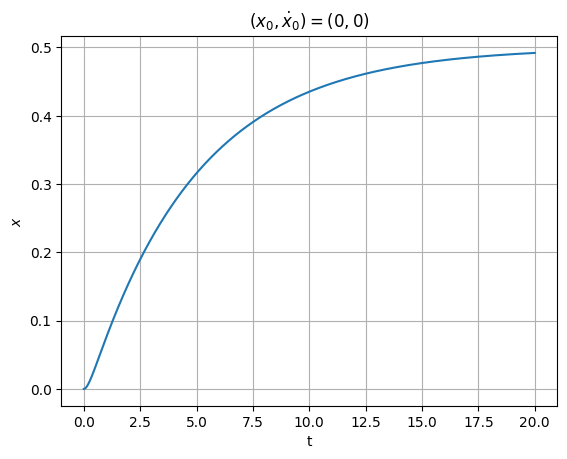

In [ ]:
# x-t plot
plt.title(r"$(x_0,\dot{x}_0)=(0, 0)$")
plt.grid()
plt.xlabel("t")
plt.ylabel(r"$x$")
plt.plot(sol_bb.t, sol_bb.y[0])

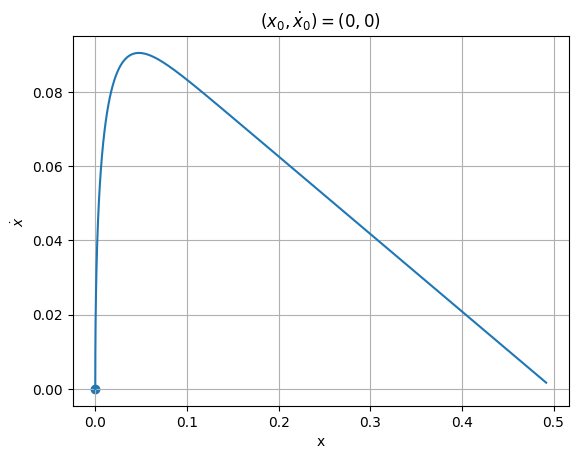

In [ ]:
# phase plot
plt.title(r"$(x_0,\dot{x}_0)=(0, 0)$")
plt.grid()
plt.xlabel("x")
plt.ylabel(r"$\dot{x}$")
plt.plot(sol_bb.y[0], sol_bb.y[1])
plt.scatter(sol_bb.y[0,0], sol_bb.y[1,0])

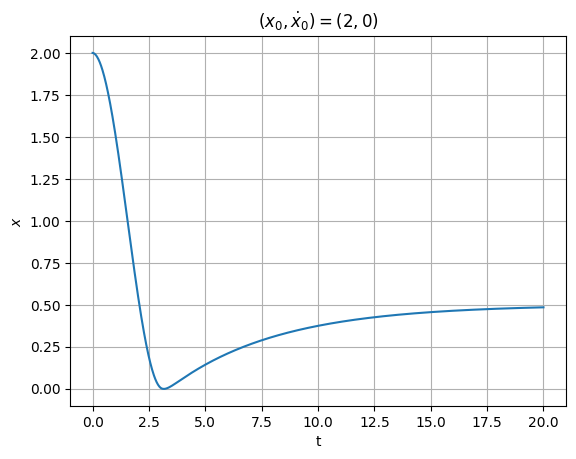

In [ ]:
# x-t  plot
plt.title(r"$(x_0,\dot{x}_0)=(2, 0)$")
plt.grid()
plt.xlabel("t")
plt.ylabel(r"$x$")
plt.plot(sol_bc.t, sol_bc.y[0])

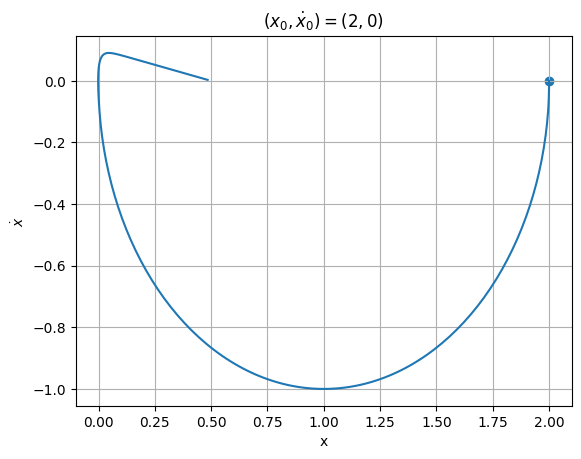

In [ ]:
# phase plot
plt.title(r"$(x_0,\dot{x}_0)=(2, 0)$")
plt.grid()
plt.xlabel("x")
plt.ylabel(r"$\dot{x}$")
plt.plot(sol_bc.y[0], sol_bc.y[1])
plt.scatter(sol_bc.y[0,0], sol_bc.y[1,0])